#### First lets start with a coin flips.

The below method should simulate coin flips with a probability of heads given by p

In [9]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
l = [2.1,4.1,6.1]
np.power(l,2)

array([ 4.41, 16.81, 37.21])

In [4]:
def coinflip(p=0.5):
    value = random.random()
    return value > p

Flip coin 5 times

In [5]:
flip_value = {0: 'Tails', 1: 'Heads'}
for i in range(5):
    print(f"Coin flipped and came up {flip_value[coinflip()]}")

Coin flipped and came up Tails
Coin flipped and came up Heads
Coin flipped and came up Heads
Coin flipped and came up Heads
Coin flipped and came up Tails


For a fair coin, when we flip a coin many times, the probability of coming up heads or tails is the same. We can plot this distribution as shown below.

In [35]:
def plotdistribution(data, x_pos):
    fig, ax = plt.subplots()
    freqs = np.bincount(data)
    x_range = np.arange(len(x_pos))

    ax.bar(x_range, freqs, align='center', alpha=0.5)
    ax.set_ylabel('Outcomes')
    ax.set_xticks(x_range)
    ax.set_xticklabels(x_pos)
    ax.set_title('Outcome Distribution')
    ax.yaxis.grid(True)

    # Save the figure and show
    plt.tight_layout()
    #plt.savefig('bar_plot.png')
    plt.show()

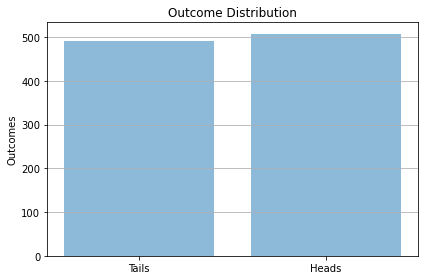

In [37]:
coin_flip_data = np.asarray([coinflip() for x in range(1000)])
plotdistribution(coin_flip_data, ['Tails', 'Heads'])


Here I given the number of trials just retrieve the likelihood distribution

In [5]:
def likelihood(nTrials, nSuccess, resolution=100):
    '''
        nTrials is the number of experiments (e.g. number of coin flips)
        nSuccess is the number of success (e.g. number of heads in nTrials)
        returns a likelihood distribution - a dataframe of values for p -> [0,1], where p is the probability of success. 
    '''

    if nSuccess > nTrials:
        return "Wrong Input"

    p_range = np.linspace(0, 1, resolution)
    event_probability = np.multiply(np.power(p_range, nSuccess), np.power((1-p_range), nTrials-nSuccess))
    denom = math.factorial(nTrials-nSuccess)*math.factorial(nSuccess)
    number_of_outcomes = math.factorial(nTrials)/denom
    l = np.multiply(event_probability,number_of_outcomes)
    return pd.DataFrame({'p':p_range, 'likelihood': l})

Plot the likelihood distribution

<AxesSubplot:xlabel='p'>

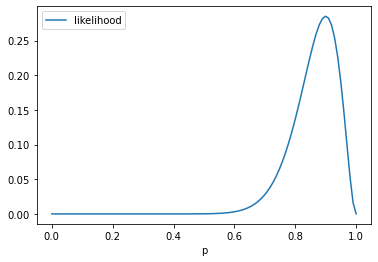

In [6]:
lik_dist = likelihood(20,18, resolution=100)
#print(lik_dist)
lik_dist.plot(x ='p', y='likelihood', kind = 'line')